In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'CIPLA.NS.csv'
Cipla=pd.read_csv(FileName)

In [ ]:
Cipla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,8.778666,8.833333,8.773333,8.832000,7.521939,208125
1,02/01/1996,8.832000,9.013333,8.400000,8.720000,7.426554,1623750
2,03/01/1996,8.720000,8.880000,8.626666,8.658666,7.374316,721875
3,04/01/1996,8.658666,8.653333,8.400000,8.568000,7.297098,620625
4,05/01/1996,8.568000,8.640000,8.506666,8.546666,7.278929,350625


In [ ]:
Cipla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6435,23/08/2021,898.000000,908.000000,888.650024,898.349976,898.349976,2081206
6436,24/08/2021,903.000000,919.549988,897.650024,917.650024,917.650024,2588128
6437,25/08/2021,917.000000,923.599976,905.950012,912.599976,912.599976,1697757
6438,26/08/2021,912.599976,916.750000,906.299988,911.299988,911.299988,1522032
6439,27/08/2021,913.799988,925.450012,907.500000,923.900024,923.900024,1878603


In [ ]:
df1=Cipla.reset_index()['Close']

In [ ]:
df1.shape

(6440,)

In [ ]:
df1

0         8.832000
1         8.720000
2         8.658666
3         8.568000
4         8.546666
           ...    
6435    898.349976
6436    917.650024
6437    912.599976
6438    911.299988
6439    923.900024
Name: Close, Length: 6440, dtype: float64

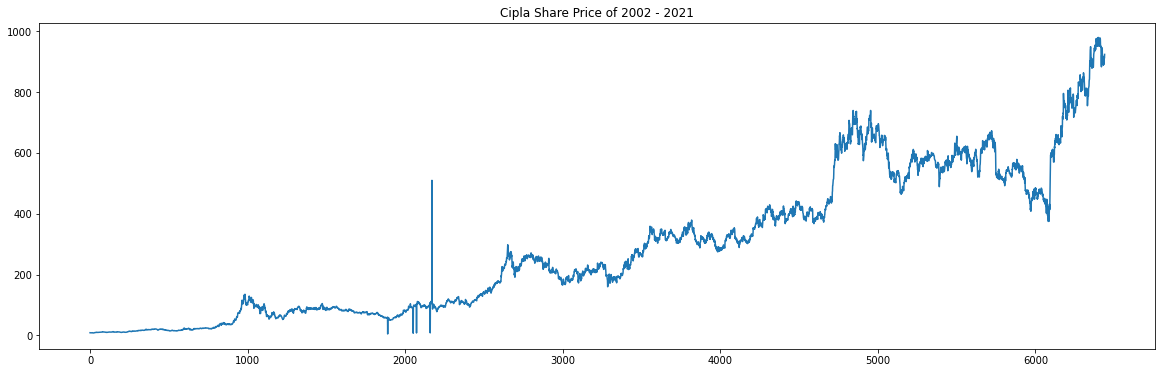

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Cipla Share Price of 2002 - 2021')
plt.plot(df1)

In [ ]:
Cipla.Date = pd.to_datetime(Cipla.Date)
Cipla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6440 non-null   datetime64[ns]
 1   Open       6440 non-null   float64       
 2   High       6440 non-null   float64       
 3   Low        6440 non-null   float64       
 4   Close      6440 non-null   float64       
 5   Adj Close  6440 non-null   float64       
 6   Volume     6440 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 352.3 KB


In [ ]:
Cipla = Cipla.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     \ 306 kB 1.3 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=e84b78b826a8d55bb4dc5c31f0a8a591c01ec4a4be49fd9c3db52fcb91f48112
  Stored in directory: /tmp/pip-ephem-wheel-cache-4z13axkt/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 736 kB/s 


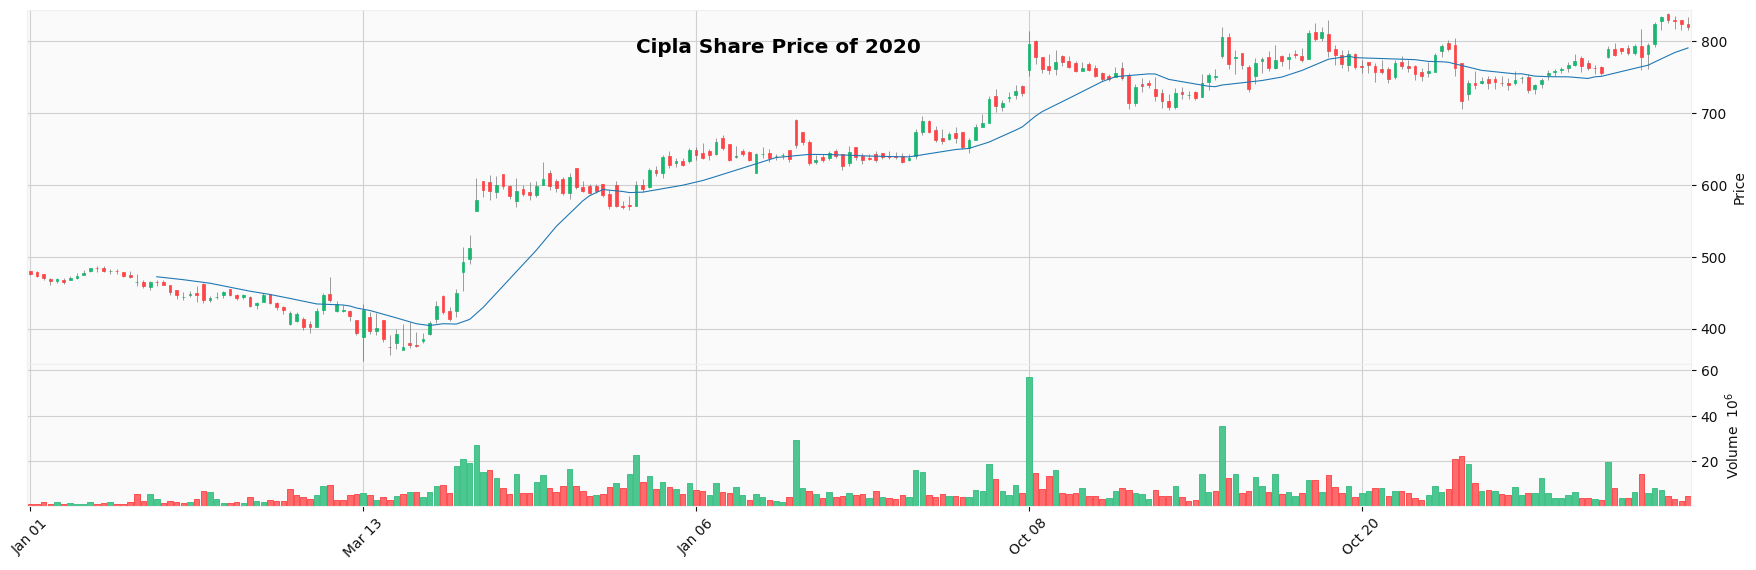

In [ ]:
import mplfinance as mpf
mpf.plot(Cipla['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Cipla Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00422122],
       [0.00410634],
       [0.00404342],
       ...,
       [0.93127382],
       [0.92994034],
       [0.942865  ]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(4830, 1610)

In [ ]:
len(train_data), len(test_data)

(4830, 1610)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00422122 0.00410634 0.00404342 ... 0.00593493 0.00600468 0.00598554]
 [0.00410634 0.00404342 0.00395042 ... 0.00600468 0.00598554 0.00591305]
 [0.00404342 0.00395042 0.00392854 ... 0.00598554 0.00591305 0.00549044]
 ...
 [0.58487339 0.58738646 0.5851811  ... 0.69062962 0.67462773 0.66708833]
 [0.58738646 0.5851811  0.62369853 ... 0.67462773 0.66708833 0.64103396]
 [0.5851811  0.62369853 0.64164939 ... 0.66708833 0.64103396 0.65180448]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(4729, 100)
(4729,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1509, 100)
(1509,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
74/74 [==============================] - 16s 154ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 2/100
74/74 [==============================] - 10s 140ms/step - loss: 2.1103e-04 - val_loss: 0.0011
Epoch 3/100
74/74 [==============================] - 10s 139ms/step - loss: 2.0254e-04 - val_loss: 9.4750e-04
Epoch 4/100
74/74 [==============================] - 10s 139ms/step - loss: 1.9959e-04 - val_loss: 9.3412e-04
Epoch 5/100
74/74 [==============================] - 10s 138ms/step - loss: 1.9211e-04 - val_loss: 8.2176e-04
Epoch 6/100
74/74 [==============================] - 10s 139ms/step - loss: 1.8389e-04 - val_loss: 0.0010
Epoch 7/100
74/74 [==============================] - 10s 138ms/step - loss: 1.6861e-04 - val_loss: 6.9626e-04
Epoch 8/100
74/74 [==============================] - 10s 139ms/step - loss: 1.5981e-04 - val_loss: 6.0032e-04
Epoch 9/100
74/74 [==============================] - 10s 140ms/step - loss: 1.6883e-04 - val_loss: 6.9144e-04
Epoch 10/100
74/74 [======

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

233.85153537911654

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

623.0279074550269

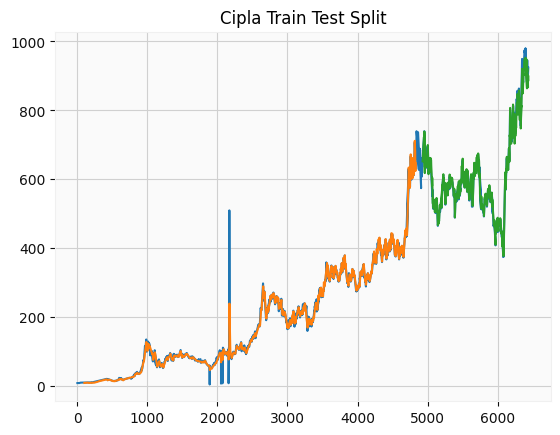

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Cipla Train Test Split')
plt.show()

In [ ]:
len(test_data)

1610

In [ ]:
x_input=test_data[1510:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92444223]
101
1 day input [0.85285421 0.85767525 0.85885491 0.9009625  0.92081107 0.90316792
 0.93291508 0.95737952 0.96584207 0.96891937 0.96384182 0.95486639
 0.92388837 0.93106871 0.92881202 0.92501668 0.92896585 0.92881202
 0.89624402 0.90670682 0.90224471 0.90080868 0.91860566 0.90901479
 0.91691312 0.92250355 0.89906487 0.90234732 0.922401   0.94317272
 0.94594229 0.95040434 0.95486639 0.96466248 0.96179029 0.95358418
 0.96897064 0.96599596 0.97445852 0.96784233 0.96594469 0.95917461
 0.97348403 0.97851029 0.99446091 0.98794727 0.99646116 0.98984497
 0.97656132 0.9706119  0.98081826 0.98004894 0.97563811 0.97758708
 0.97056062 0.97692031 0.98302362 1.         0.99210167 0.99846135
 0.99958973 0.99497379 0.98922948 0.98522904 0.97030418 0.97968989
 0.97974116 0.98569064 0.99748693 0.99384542 0.99748693 0.99425575
 0.97492012 0.96953486 0.96758588 0.97020157 0.9317867  0.90798902
 0.90101378 0.93891577 0.93994153 0.94722449 0.95902078 0.96491892
 0.92994034 0.93747974 0.93127382

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6440

Text(0.5, 1.0, 'Cipla Prediction of Next 30 Days')

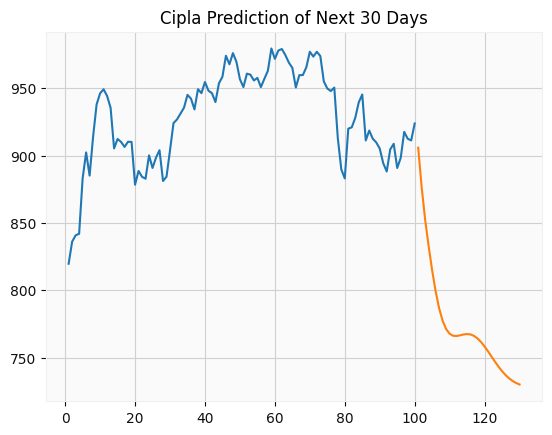

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6340:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Cipla Prediction of Next 30 Days')

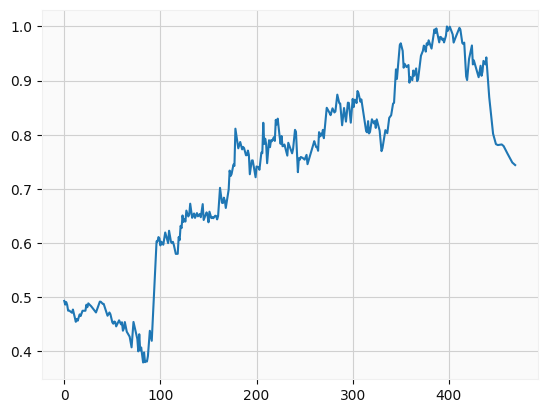

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

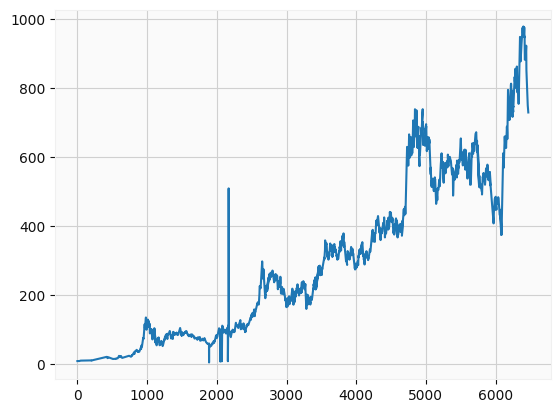

In [ ]:
plt.plot(df3)